# Reproducibility of hemodynamic simulations of cerebral aneurysms across imaging modalities 3DRA and CTA

Arjan Geers

This notebook reproduces\* the data analysis [presented](http://dx.doi.org/10.3174/ajnr.A2306) in:

Geers AJ, Larrabide I, Radaelli AG, Bogunovic H, Kim M, Gratama van Andel HAF, Majoie CB, VanBavel E, Frangi AF. Patient-specific computational hemodynamics of intracranial aneurysms from 3D rotational angiography and CT angiography: An in vivo reproducibility study. American Journal of Neuroradiology, 32(3):581–586, 2011.

The goal of the study was to determine the reproducibility of blood flow simulations of cerebral aneurysms. Patients with a total of 10 cerebral aneurysms were imaged with both 3D rotational angiography (3DRA) and computed tomographic angiography (CTA). Each image independently was segmented to obtain a vascular model, the same boundary conditions were imposed, and a CFD simulation was obtained.

\*Originally, data was analyzed in MATLAB R2010b and the boxplot was created in Mathematica 7. 

## Preamble

In [1]:
%matplotlib inline

In [2]:
import os
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Data

The data used in this notebook is also available on [FigShare](http://dx.doi.org/10.6084/m9.figshare.1354056):

Geers AJ, Larrabide I, Radaelli AG, Bogunovic H, Kim M, Gratama van Andel HAF, Majoie CB, VanBavel E, Frangi AF. Reproducibility of hemodynamic simulations of cerebral aneurysms across imaging modalities 3DRA and CTA: Geometric and hemodynamic data. FigShare, 2015. DOI: 10.6084/m9.figshare.1354056

Variables are defined as follows (TA: time-averaged; PS: peak systole; ED: end diastole):
* A_N: Aneurysm neck area
* V_A: Aneurysm volume
* Q_P: TA flow rate in the parent vessel just proximal to the aneurysm
* Q_A: TA flow rate into the aneurysm
* NQ_A: Q_A / Q_P
* WSS_P: Average TA WSS on the wall of a parent vessel segment just proximal to the aneurysm
* WSS_A: Average TA WSS on the aneurysm wall
* NWSS_A: WSS_A / WSS_P
* LWSS_A: Portion of the aneurysm wall with WSS < 0.4 Pa at ED
* MWSS_A: Maximum WSS on the aneurysm wall at PS
* 90WSS_A: 90th percentile value of the WSS on the aneurysm wall at PS
* N90WSS_A: 90WSS_A normalized by the average WSS on the aneurysm wall at PS

In [3]:
df_input = pd.read_csv(os.path.join('..', 'data', '3dracta.csv'), index_col=[0, 1])
df_input

A_N (mm^2)  V_A (mm^3)  Q_P (ml/s)  Q_A (ml/s)  NQ_A (-)  \
aneurysm modality                                                             
1        3dra        10.86590    99.96930    0.802316    0.248101  0.309231   
         cta         11.15860    90.72130    0.931848    0.272572  0.292507   
2        3dra         5.70885    75.60960    1.022250    0.253962  0.248434   
         cta         10.17370    82.52750    1.083660    0.397253  0.366585   
3        3dra        43.96060   252.58500    3.832880    2.563560  0.668834   
         cta         40.14880   211.34400    3.891610    2.324100  0.597208   
4        3dra         4.54251    14.73060    1.513200    0.103740  0.068557   
         cta          5.68930    23.40980    1.377660    0.189543  0.137583   
5        3dra         5.86201    27.39740    1.437710    0.149797  0.104191   
         cta          7.63628    48.30030    1.204250    0.218592  0.181517   
6        3dra         5.39767    36.34760    1.310440    0.314712  0.240158   
         cta          7.86209    50.72350    0.989934    0.276741  0.279555   
7        3dra         5.55784    10.97360    0.501425    0.125418  0.250123   
         cta          6.98354     8.54009    0.648833    0.089339  0.137692   
8        3dra         6.49002    47.28300    0.960516    0.210359  0.219006   
         cta          9.50605    58.80870    1.117180    0.305728  0.273660   
9        3dra         7.33072    63.42630    0.758863    0.316452  0.417008   
         cta         12.16940    69.04150    0.886087    0.424678  0.479273   
10       3dra        12.14750    17.73510    0.429972    0.142907  0.332364   
         cta         12.26440    20.11400    0.453661    0.121871  0.268639   

                   WSS_P (Pa)  WSS_A (Pa)  NWSS_A (-)  LWSS_A (%)  \
aneurysm modality                                                   
1        3dra        2.331846    0.294939    0.126483     98.4145   
         cta         3.141360    0.477639    0.152048     96.5158   
2        3dra        3.615952    0.929840    0.257149     87.3248   
         cta         4.159494    1.703760    0.409608     61.6519   
3        3dra        4.752174    3.613770    0.760446     18.5258   
         cta         3.846412    4.395800    1.142831     12.2532   
4        3dra        5.775914    1.259550    0.218069     83.2923   
         cta         7.221444    1.629840    0.225694     61.0439   
5        3dra        6.371102    1.024260    0.160767     85.2382   
         cta         4.447916    0.648933    0.145896     85.8872   
6        3dra        6.336688    1.678210    0.264840     75.3191   
         cta         2.787544    0.809631    0.290446     86.8092   
7        3dra        2.351670    0.609926    0.259359     97.4791   
         cta         1.412796    0.424363    0.300371    100.0000   
8        3dra        5.117116    0.988544    0.193184     89.2279   
         cta         3.613698    1.412300    0.390818     79.9806   
9        3dra        3.927316    0.975021    0.248267     79.6037   
         cta         4.509520    1.509220    0.334674     67.0428   
10       3dra        1.009174    0.328531    0.325544     99.1141   
         cta         0.786753    0.233781    0.297147     99.8386   

                   MWSS_A (Pa)  90WSS_A (Pa)  N90WSS_A (-)  
aneurysm modality                                           
1        3dra         26.34070        1.3542      2.529244  
         cta          39.74110        2.4450      1.816453  
2        3dra         53.93430        6.1250      2.500898  
         cta          50.03900       12.7500      2.441135  
3        3dra         90.47730       18.1900      2.155246  
         cta         200.11900       22.4990      2.019677  
4        3dra         54.70780        8.0430      1.563241  
         cta          98.67530        9.0040      1.439104  
5        3dra         73.87120        3.8310      1.474777  
         cta          46.76190        2.8200      1.672370  
6        3dra         89.5508

Extract separate dataframes for 3DRA and CTA.

In [4]:
df_3dra = df_input.xs('3dra', level='modality')
df_cta = df_input.xs('cta', level='modality')

## Statistics

Calculate the relative difference between 3DRA and CTA wrt 3DRA. Per variable, get the mean and standard error of this relative difference over all aneurysms.

In [5]:
df_reldiff = 100 * abs(df_3dra - df_cta)/df_3dra
s_mean = df_reldiff.mean()
s_standarderror = pd.Series(stats.sem(df_reldiff), index=df_input.columns)

Test differences between 3DRA and CTA with the Wilcoxon signed rank test.

Note: MATLAB was used to perform this test for the paper. Its 'signrank' function defaults to using the 'exact method' if a dataset has 15 or fewer observations and the 'approximate method' otherwise. See the [documentation](http://www.mathworks.com/help/stats/signrank.html) for more details. SciPy's 'wilcoxon' function has currently (version 0.19.2) no option to set the method and always uses the 'approximate method'.

In [6]:
pvalue = np.empty(len(df_input.columns))
for i, variable in enumerate(df_input.columns):
    pvalue[i] = stats.wilcoxon(df_3dra[variable], df_cta[variable])[1]
s_pvalue = pd.Series(pvalue, index=df_input.columns)

Determine the number of aneurysms for which a variable is lower for CTA than for 3DRA.

In [7]:
numberofcases = np.empty(len(df_input.columns))
for i, variable in enumerate(df_input.columns):
    numberofcases[i] = sum(df_3dra.loc[j, variable] > df_cta.loc[j, variable]
                           for j in df_input.index.levels[0])
s_numberofcases = pd.Series(numberofcases, index=df_input.columns)

Compose a dataframe with the obtained statistical results, corresponding to the 'online table' of the journal paper.

In [8]:
d = {'M': s_numberofcases,
     'P': s_pvalue,
     'Mean (%)': s_mean,
     'SE (%)': s_standarderror}

df_output = pd.DataFrame(d, columns=['M', 'P', 'Mean (%)', 'SE (%)'])
df_output

,M,P,Mean (%),SE (%)
A_N (mm^2),1.0,0.046853,32.983580,8.255170
V_A (mm^3),3.0,0.332880,27.831246,7.371964
Q_P (ml/s),3.0,0.798859,14.132048,2.760287
Q_A (ml/s),4.0,0.332880,33.935011,7.613580
NQ_A (-),4.0,0.575062,35.899038,9.812996
WSS_P (Pa),6.0,0.241121,28.619799,4.000974
WSS_A (Pa),4.0,0.386271,44.153491,5.981574
NWSS_A (-),2.0,0.036658,31.384315,9.886644
LWSS_A (%),6.0,0.168807,13.737524,3.996757
MWSS_A (Pa),6.0,0.798859,47.935841,11.947199


## Boxplot

Make boxplots showing the distributions of the relative differences over all aneurysms.

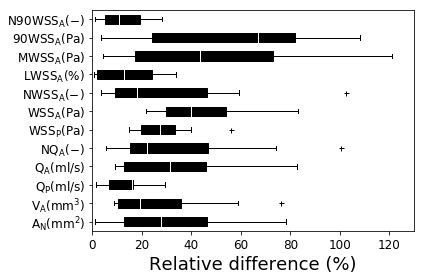

In [9]:
# extract arrays to plot from dataframe
array_yticklabels = ['$\mathregular{' + variable.replace('%', '\%') + '}$'
                     for variable in df_reldiff.columns]
array_reldiff = df_reldiff.as_matrix()

# create plot
fig, ax = plt.subplots()
bp = ax.boxplot(array_reldiff, sym='+', vert=0, patch_artist=True)

# set labels
ax.set_xlabel('Relative difference (%)', fontsize=18)
ax.set_xlim(0, 130)
ax.set_yticklabels(array_yticklabels, fontsize=12)

# format box, whiskers, etc.
plt.setp(ax.get_xticklabels(), fontsize=12)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['medians'], color='white')
plt.setp(bp['whiskers'], color='black', linestyle='-')
plt.setp(bp['fliers'], color='black', markersize=5)
plt.tight_layout()